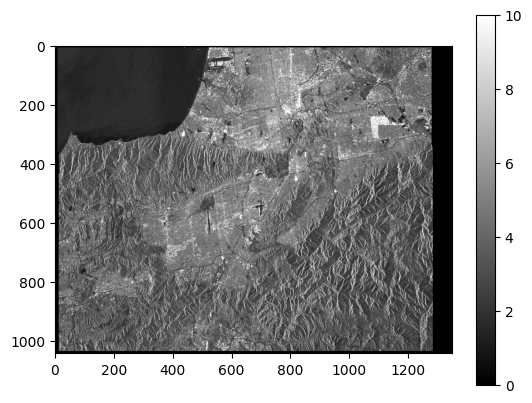

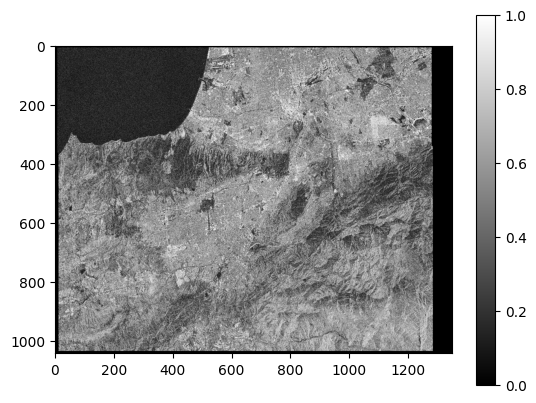

(1043, 1348)
(1043, 1348)


In [1]:
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
def readAmp(file):

    # Get filename
    fileXml = file + '.xml'

    # Get width and length of image
    bands = 2  # Amplitude file (.amp) contains the amplitudes of both SLC images stored in 2 bands in BIP format.
    tree = ET.parse(fileXml)
    root = tree.getroot()
    width = int(root.find(".//property[@name='width']/value").text)
    length = int(root.find(".//property[@name='length']/value").text)

    # Read image
    with open(file, 'rb') as f:
        # data = np.fromfile(f, dtype=np.float32)
        data = np.fromfile(f, dtype = '<f4')        # Little endian 
        data2 = data.reshape([length, width * 2])    # Reshape for BIP schema
        amp1 = data2[:, ::2]  # Extract amplitudes from 1st SLC image
        amp2 = data2[:, 1::2]  # Extract amplitudes from 2nd SLC image

    # Plot images for sanity check
    plt.imshow(amp1, cmap='gray',vmin=0, vmax=5)
    plt.colorbar()
    plt.show()
    plt.imshow(amp2, cmap='gray',vmin=0, vmax=5)
    plt.colorbar()
    plt.show()

    return amp1, amp2

def readCor(file):

    # Get filename
    fileXml = file + '.xml'

    # Get width and length of image
    bands = 2  # Coherence files always have 2 bands
    tree = ET.parse(fileXml)
    root = tree.getroot()
    width = int(root.find(".//property[@name='width']/value").text)
    length = int(root.find(".//property[@name='length']/value").text)

    # Read image
    with open(file, 'rb') as f:
        data = np.fromfile(f, dtype=np.float32)
        data2 = data.reshape([length*2, width])
        amp = data2[::2, :]  # Extract amplitudes from 1st band
        cor = data2[1::2, :]  # Extract coherences from 2nd band

    # Plot images for sanity check
    # import matplotlib.pyplot as plt
    plt.imshow(amp, cmap='gray',vmin=0, vmax=10)
    plt.colorbar()
    plt.show()
    plt.imshow(cor, cmap='gray',vmin=0, vmax=1)
    plt.colorbar()
    plt.show()

    return amp, cor
    
root = "/home/zulun001/TGNN_sharing_20250214/merged/cors/cor_20240103_20240115/"
amp, cor = readCor(root+'b01_16r4alks.cor')
print(amp.shape)
print(cor.shape)